#  Classification

# <font color="#0995EC"> I. Introduction </font>


*The objective of this assignment is to perform classification models on the datasets(training and testing) using the following algorithms: *

**1. Pocket Algorithm**<br>
**2. Quadratic Discriminant Analysis**<br>
**3. Linear Discriminant Analysis**<br>
**4. Logistic Regression ** 

*The algorithms implemented in this notebook are applied to Customer Credit Card Default Payment dataset. Experiment have been performed by partitioning the dataset into training and testing and then the results are compared.*

# <font color="#FE2E64">  II. Data </font>

## Dataset Description:
This research was conducted in Chung Hua University, Taiwan and aims at customer's credit card default payments. The goal is to classify whether the customer will have a default payment for the following month or not. The dataset has 23 inputs on which the decision will depend.

**It consists of the following attributes:**
1. default payment (Yes = 1, No = 0) 
2. X1: Amount of the given credit
3. X2: Gender (1 = male; 2 = female). 
4. X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
5. X4: Marital status (1 = married; 2 = single; 3 = others). 
6. X5: Age (year). 
7. X6 - X11: History of past payment. Tracked the past monthly payment records (from April to September, for the year 2005) as follows:<br>
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.<br>
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
8. X12-X17: Amount of bill statement.<br>
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
9. X18-X23: Amount of previous payment. <br>
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Source of data
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import copy
from IPython.display import display, Markdown

### Sample of first few rows

In [427]:
df = pd.read_csv(r'Credit Card Defaulters.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Variable Data Type

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

**_Checking the type of each variable and if there are any missing values in the dataset. Since all the columns have 30000 entries, we will continue with further stages of pre-processing._**

In [429]:
df['SEX'].replace({1: 'Male', 2 : 'Female'}, inplace=True)
df['MARRIAGE'].replace({1: 'Married', 2 : 'Single', 3 : 'Others'}, inplace=True)
df['EDUCATION'].replace({1: 'Gradudate School', 2 : 'Univeristy', 3 : 'High School', 4 : 'Others'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,Univeristy,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,Univeristy,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,Univeristy,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,Univeristy,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,Univeristy,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**As a part of pre-processing replacing number with characters so that graphs look more visually appealing and user readable.**

### Correlation Matrix

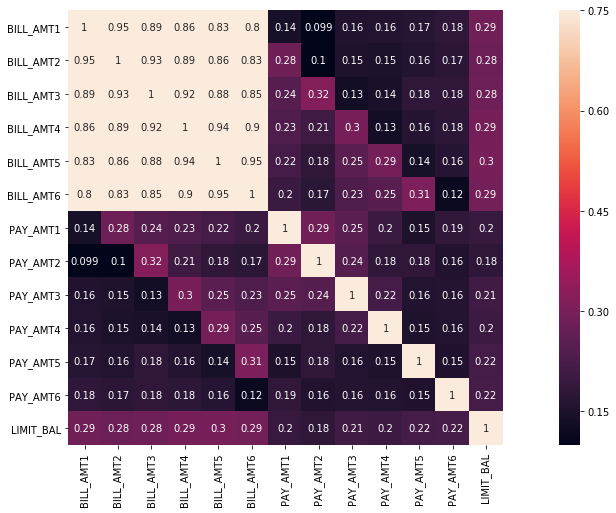

In [430]:
corrmat=df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6","LIMIT_BAL" ]].corr()
fig, plot2=plt.subplots(figsize=(20,8))
sns.heatmap(corrmat, vmax=.75, square=True, annot=True)
plt.show()

*I have created a correlation matrix between limit balances, bill amounts and payments amounts. We can infer that there is a low correlation between the limit balances and payments and bill amounts. But it can be seen that bill amounts has high correlation between each other as expected since the bills are reflecting the cumulative amounts.*

### Box Plot

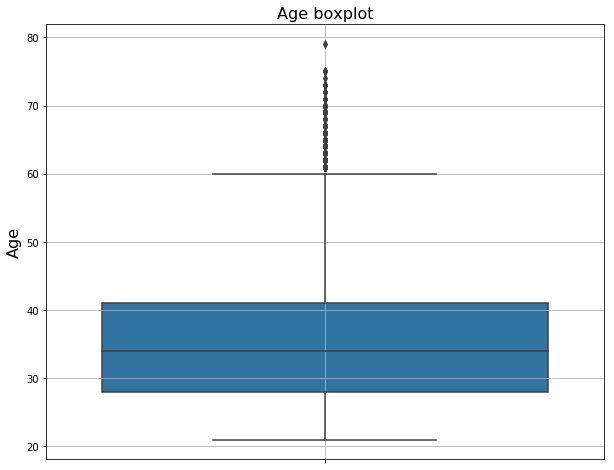

In [431]:
plt.figure(figsize=(10,8))
age=df[(df['AGE']>=21) & (df['AGE']<=80) ]
sns.boxplot( y=age['AGE'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

**Age Boxplot**

*The median age is 34 years old and most customers are between 28 and 41 years old*

### Bar Plot

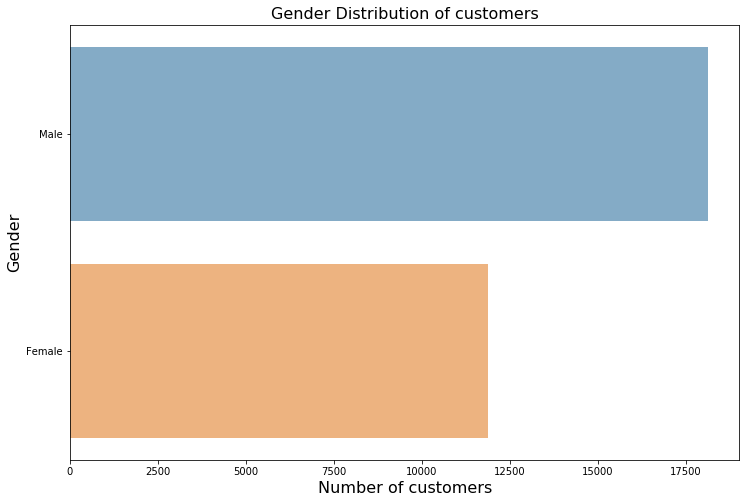

In [432]:
plt.figure(figsize=(12,8))
sex = df['SEX'].value_counts()
sns.barplot(y=sex.index, x=sex.values, alpha=0.6)
plt.yticks(range(len(df['SEX'].value_counts().index)), ['Male', 'Female'])
plt.title("Gender Distribution of customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();

*The above barplot shows the number of male and female customers in the dataset. Male customers are dominating population in the dataset so we can infer that there could be a possibility of males customers using the credit card more than female customers.*

## Factor Plot

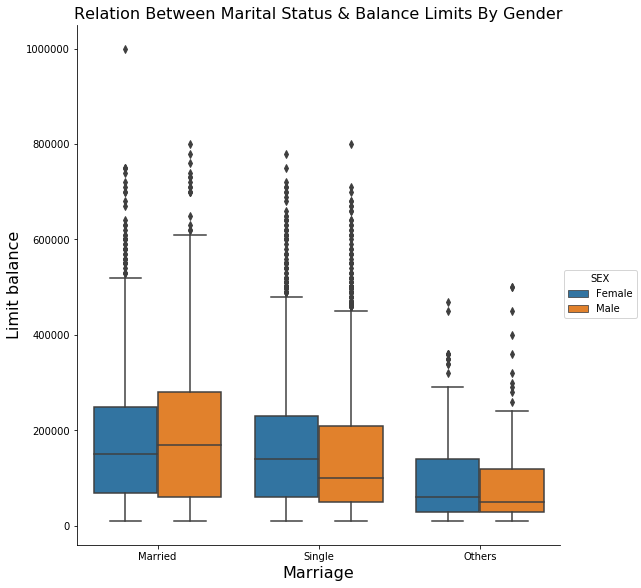

In [433]:
plt.figure(figsize=(20,8))
sns.factorplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=df, kind="box", size=8)
plt.title("Relation Between Marital Status & Balance Limits By Gender", fontsize=16)
plt.xlabel("Marriage", fontsize=16)
plt.ylabel("Limit balance", fontsize=16)

*From the above plot we can see that there is no change at female side in balance limits depending on their marital status but it changes a lot for the male side maybe because of the expenditures after marriage which is the reason on increased balance limits.*

### Bar Plot

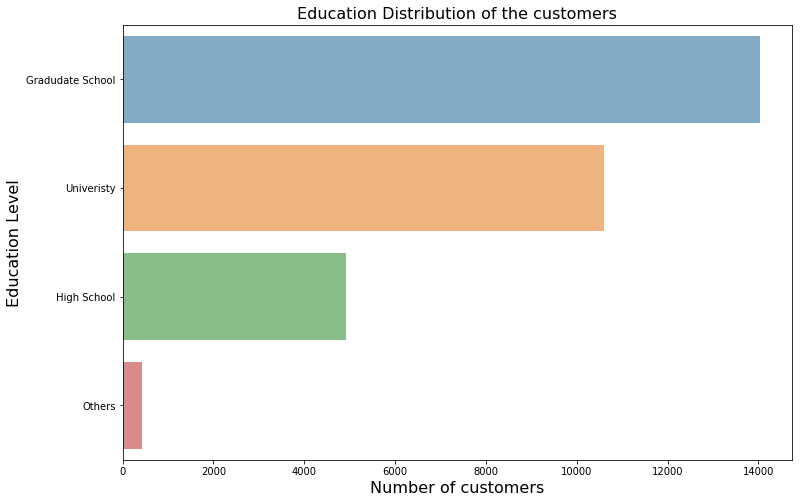

In [434]:
plt.figure(figsize=(12,8))
edu = df['EDUCATION'].value_counts()
sns.barplot(y=edu.index, x=edu.values, alpha=0.6)
plt.yticks(range(len(df['EDUCATION'].value_counts().index)), ['Gradudate School', 'Univeristy', 'High School', 'Others'])
plt.title("Education Distribution of the customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Education Level", fontsize=16)
plt.show();

*The above barplot shows the number of customers and their education level in the data set. Maximum number of Graduate school students are using the  credit card followed by university going students, high school students and others.*

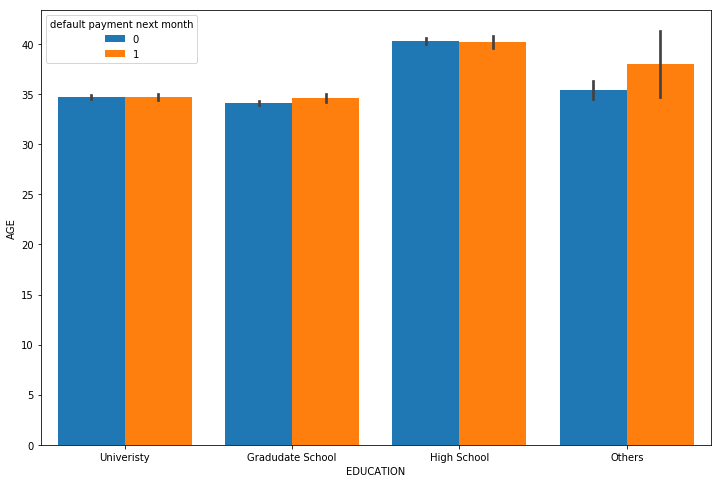

In [435]:
plt.figure(figsize=(12,8))
df["default payment next month"].replace({""})
sns.barplot(x='EDUCATION',y='AGE', hue='default payment next month', data=df, saturation=1 )

*The above graph is a comparison between age and education and shows customers who have a default payment next month. Most of the defaulters are others who could probably be school drop outs and hence don't have funds in the form of scholarship to meet their payments and end up being defaulters.
Whereas all the other students could be among the people with scholarship or funds from their parents and have an equal possibility of not being defaulters.*

### Pie chart and Count plot

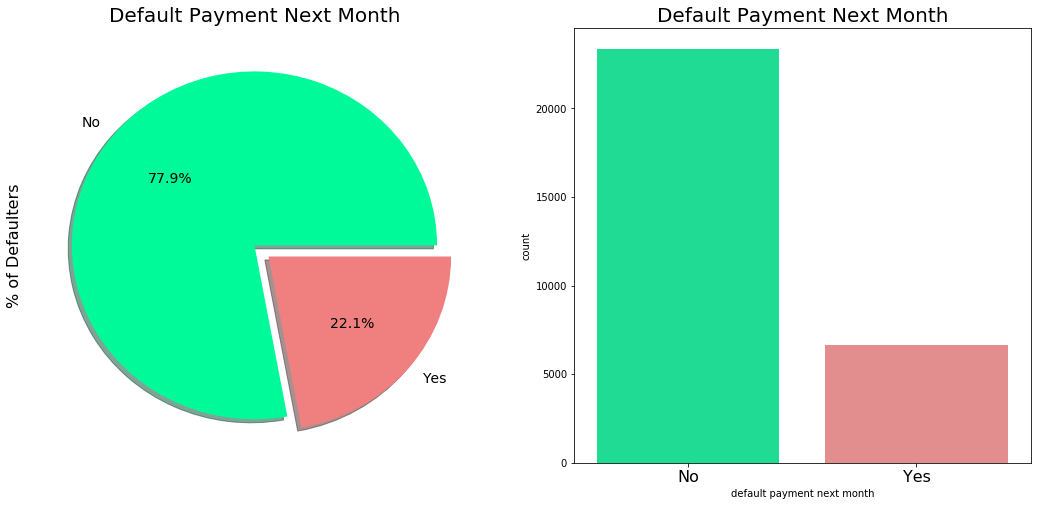

In [436]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#00FA9A", "#F08080"]
labels = 'No', 'Yes'
df['default payment next month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Default Payment Next Month', fontsize=20)
ax[0].set_ylabel('% of Defaulters', fontsize=16)
sns.countplot('default payment next month',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Default Payment Next Month', fontsize=20)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=16)
plt.show()

*The Pie chart gives the percentage of defaulters and the Count plot gives the number of defaulters.
We can infer that 22.1% which is 6, 630 customer out of a total of 30,000 will be defaulters next month. Whereas 77.9% which is 23,370 will make the monthly payment.*

# <font color="#07D01E"> III. Method </font>

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Class Definition
* *Normalize Method: This method is used to perform feature scaling on the data by subtracting each instance by a mean value and then dividing it by the standard deviation*

In [335]:
import numpy as np
import abc

# Super class for machine learning models 

class BaseModel(abc.ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abc.abstractmethod
    def train(self, X, T):
        pass

    @abc.abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. 

Let us consider the case of misclassification. 
For positive class example, $\xv_i$, 

$$
y_i = \wv^{(k)} \xv_i < 0.
$$

To fix this classification error, we want to update the weight $\wv^{(k)}$ to increase the output $y_i$.
Thus, we expect

$$
 \wv^{(k+1)} \xv_i >  \wv^{(k)} \xv_i.
$$

This can be reached by using $\xv_i$ as a gradient as follows: 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i
$$

where $\alpha$ is the learning rate. 

When the sample $t_i$ is negative, we need to do the opposite

$$
 \wv^{(k+1)} \xv_i <  \wv^{(k)} \xv_i.
$$

To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$


When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. Thus, to overcome the unstability of the perceptron algorithm, we use **pocket algorithm**.
The Pocket Algorithm is an extension of the Perceptron Algorithm. This algorithm is used for training the Perceptron.
The Perceptron algorithm is used for supervised learning of binary classifiers that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Once, the weight is updated, on each iteration the weight is compared to check if it is better than the previous weight. If so the algorithm stores the best weight in its pocket.Hence, $\wv_{pocket}$ will contain the best solution so far.  

#### Implementation
The Pocket algorithm is implemented by Pocket class defined below:
* the class contains two attributes: the learning rate alpha to decide on how much step must the weight increase/decrease on each iteration and the w_pocket to store the best value of the weight
* train method:  Once the data is explored and partitioned to training set and a test set and apply transformation pipelines such as feature scaling to clean up and prepare the data for Machine Learning algorithms, we then select and train a Machine Learning model in the train method. The train method is where we compute the weights. We first check if the prediction on each of the training example computed using the previous value of weight is equal to the target train sample (we check the signs). If the signs are different we update the weight accordingly and call the compare method. The result of the compare method says which of the weights are better and stores the best weight in the pocket.
* use method: After tweaking the models for a while, we eventually have a system that performs sufficiently well. The model makes a prediction by computing a weighted sum of the input features. We now evaluate the final model on the test set with the pocket weights.

In [406]:
class PocketAlgorithm(Classifier):
    
     # return 1 if w is better -1 if wp is better
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    # training Pocket Algorithm 
    def train(self, X, T):
        X = self.normalize(X)
        X = self.add_ones(X)
        
        m = np.shape(X)[0]        
        maxiter = 100
        alpha = 0.1
        
        self.w = np.zeros(np.shape(X)[1])
        w_pocket = copy.copy(self.w)
        
        for i in range(maxiter):
            converged = True
            for k in np.random.permutation(m):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    converged = False
                    self.w += alpha * T[k] * X[k]
                    
                    if self.compare(X, T, self.w, w_pocket) > 0: 
                        w_pocket[:] = self.w[:]
            if converged:
                break
        self.w = w_pocket
     # apply the learned model to data X   
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        return np.sign(X @ self.w)

### C. QDA

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$


For a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

Using this inequality and the Gaussian Assumption, we can come up with following inequality: 

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

*Gaussian Assumption:*
$$
p(\xv \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) }.
$$


Since both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

In QDA analysis, our job is to find the class which gives maximum probability for the above discriminant function.

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Implementation
The QDA algorithm is implemented by QDA class defined below. 
* "train" method of the class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* "use" method calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [349]:
class QDA(Classifier):
    def train(self, X, T): 
        # Initialize
        self.classes = np.unique(T)
        self.prior = []
        self.sigma = []
        self.mu = []
        
        # Normalize Input
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        # Calculate prior probability, sigma & mu
        for i, k in enumerate(self.classes):
            indices = np.where(T == k)[0]
            self.prior.append(len(indices) / N)
            self.sigma.append(np.cov(X[indices].T))
            self.mu.append(np.mean(X[indices], 0))
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        d = []
        
        # Calculate discriminant
        for i, k in enumerate(self.classes):
            sigma_inv = np.linalg.inv(self.sigma[i])
            diffv = X - self.mu[i]
            d.append(-0.5 * np.log(np.linalg.det(self.sigma[i])) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(self.prior[i]))
        # Read index of largest discriminant
        T = np.argmax(d, 0)
        return [self.classes[t] for t in T]

### D. LDA

The problems with QDA are:
* Maintaining the covariance matrix for each class is not cheap
* The data is under-sampled, the resulting class boundary has high chance of over-fitting

LDA instead use same covariance for all classes
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\ 
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

From the above equation (same as QDA), we can remove the quadratic term in our discriminant function and we will end up with: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

#### Implementation
The LDA algorithm is implemented by LDA class defined below. 
* "train" method of the class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* "use" method calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [365]:
class LDA(Classifier):
    def train(self, X, T):        
        self.classes = np.unique(T)
        self.prior = {}
        self.mu = {}
        
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        self.sigma = np.cov(X.T)
        
        for k in self.classes:
            indices = np.where(T == k)[0]
            self.prior[k] = len(indices) / N
            self.mu[k] = np.mean(X[indices], 0)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        N = np.shape(X)[0]
        T = []
        d = {}
        sigma_inv = np.linalg.inv(self.sigma)
        
        for k in self.classes:
            d[k] = np.sum(np.dot(X, sigma_inv) * self.mu[k] \
                - 0.5 * np.dot(self.mu[k], sigma_inv) * self.mu[k] \
                + np.log(self.prior[k]), axis=1)
        
        for n in range(N):
            max_d = -math.inf
            max_k = None
            for k in self.classes:
                if d[k][n] > max_d:
                    max_k = k
                    max_d = d[k][n]
                T.append(k)
        return T

### E. Logistic Regression

Logistic regression model predicts $P(T=k \mid \xv)$ for every class k. Reconsidering the Linear Regression model:
$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus, for Logistic Regression we have:

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = y.
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


#### Implementation
The Logistic Regression algorithm is implemented by the class define below. The purpose of each method is as follows:
* "softmax" for the Logistic Regression is implemented in the "softmax" method. 
* "g" method computes the dot product of input and weight and pass the result to the "softmax" function
* "train" method generates weights with 1000 iterations. Learning rate is taken as 0.1
* "use" function uses the weights to calculate probability for each class and returns class with highest probability

In [369]:
class LogisticRegression(Classifier):
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self, X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        self.classes = np.unique(T).tolist()
        X = self.normalize(X)
        X = self.add_ones(X)
        
        niter = 1
        alpha = 0.1
        self.w = np.random.rand(np.shape(X)[1], len(self.classes))
        Tmatrix = np.zeros((np.shape(X)[0], len(self.classes)))
        
        for i,t in enumerate(T):
            Tmatrix[i][self.classes.index(t)] = 1
            
        for step in range(niter):
            y = self.g(X, self.w)
            self.w += alpha * X.T @ (Tmatrix - y)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        T = np.argmax(self.g(X, self.w), 1)
        return [self.classes[t] for t in T]

# <font color="#C34F0D">IV. Experiments </font>

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

In [395]:
#Partitioning the dataset into train and test datasets
data = pd.read_csv(r'Credit Card Defaulters.csv')
train = data.sample(frac = .75)
test = data.sample(frac = .25)

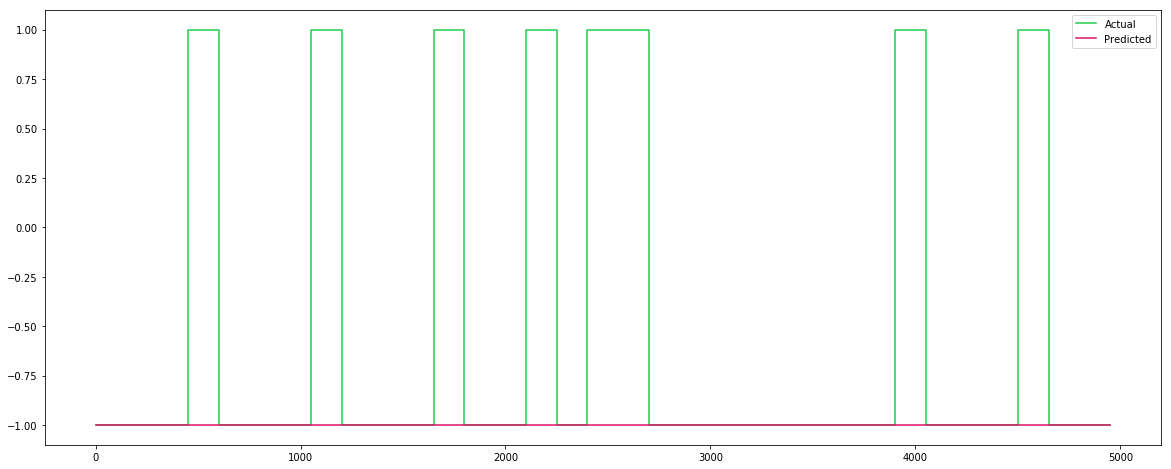

In [407]:
classifier = PocketAlgorithm()
X = train.sample(5000)
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for Pocket Algorithm (Train Dataset)

In [408]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 81.64%

Precision for decision value 0: 0.92
Recall for decision value 0: 0.83

Precision for decision value 1: 0.29
Recall for decision value 1: 0.68


Predicted,0,1
Actual,,
0,3767,147
1,771,315


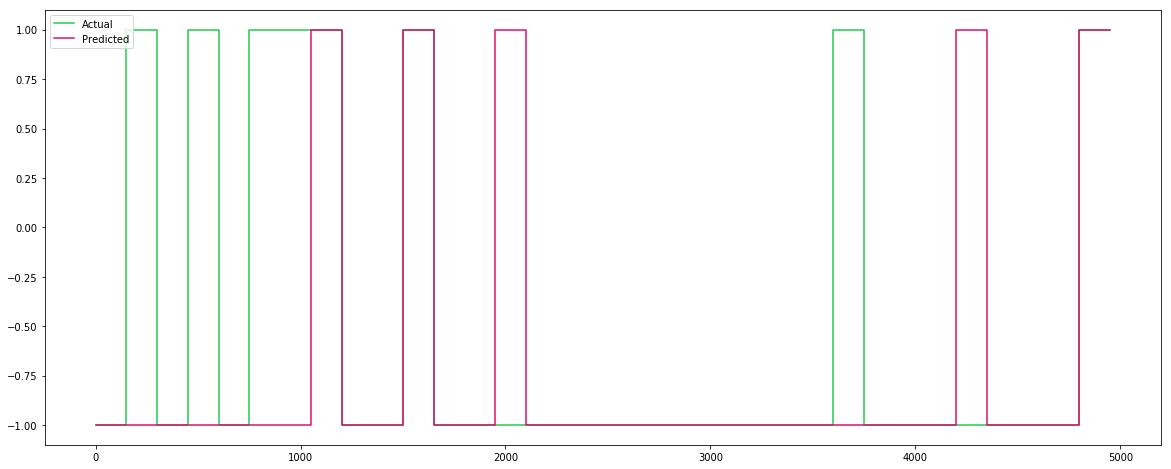

In [388]:
classifier = PocketAlgorithm()
X = train.sample(5000)
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for Pocket Algorithm (After training the model on train dataset and using it to predict on the test dataset)

In [389]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 81.32%

Precision for decision value 0: 0.88
Recall for decision value 0: 0.85

Precision for decision value 1: 0.42
Recall for decision value 1: 0.63


Predicted,0,1
Actual,,
0,3587,279
1,655,479


**Note:** *For Pocket Algorithm I have taken 5000 samples as it is taking a lot of time to evaluate the results.*

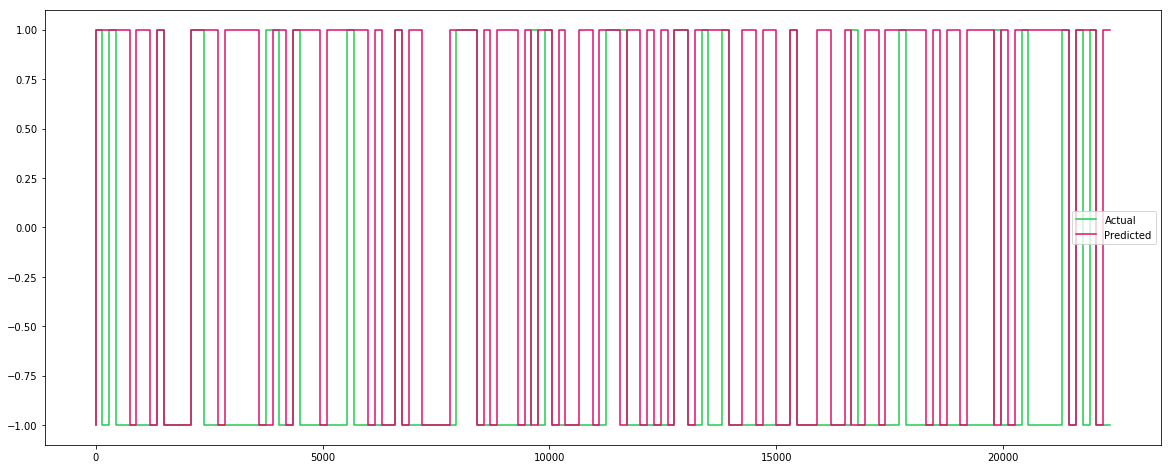

In [410]:
classifier = QDA()
X = train
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for QDA (Train Dataset)

In [412]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 53.7288888889%

Precision for decision value 0: 0.68
Recall for decision value 0: 0.89

Precision for decision value 1: 0.79
Recall for decision value 1: 0.29


Predicted,0,1
Actual,,
0,8190,9372
1,1039,3899


[-1  1]


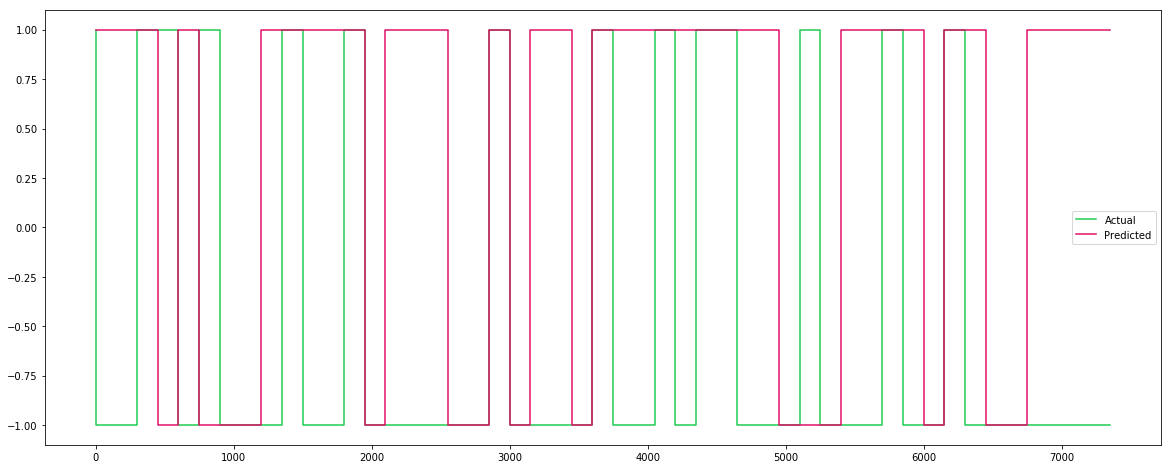

In [413]:
classifier = QDA()
X = test
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for QDA  (After training the model on train dataset and using it to predict on the test dataset)

In [414]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 43.16%

Precision for decision value 0: 0.56
Recall for decision value 0: 0.9

Precision for decision value 1: 0.87
Recall for decision value 1: 0.26


Predicted,0,1
Actual,,
0,1808,4055
1,208,1429


[-1  1]


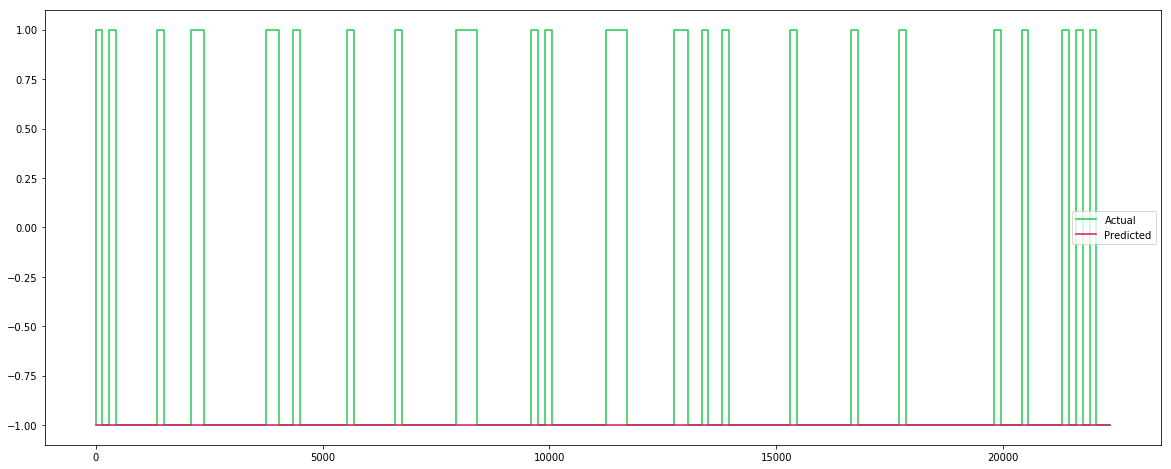

In [400]:
classifier = LDA()
X = train
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::300], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for LDA (Train Dataset)

In [416]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 43.16%

Precision (0): 0.56
Recall (0): 0.9

Precision (1): 0.87
Recall (1): 0.26


Predicted,0,1
Actual,,
0,1808,4055
1,208,1429


[-1  1]


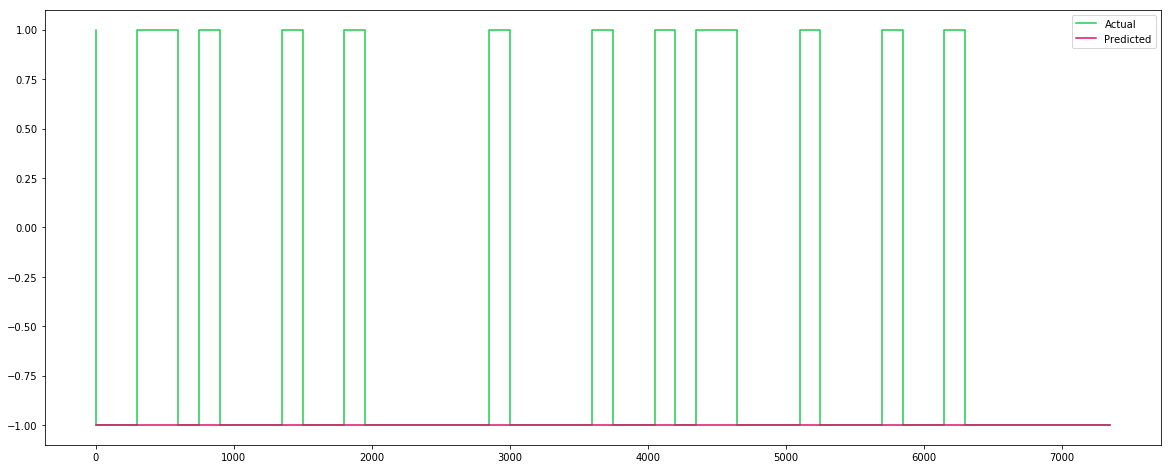

In [417]:
classifier = LDA()
X = test
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::300], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for LDA  (After training the model on train dataset and using it to predict on the test dataset)

In [418]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 50.3866666667%

Precision (0): 0.78
Recall (0): 0.79

Precision (1): 0.51
Recall (1): 0.22


Predicted,0,1
Actual,,
0.0,2946,2917
1.0,804,833


C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


[-1  1]


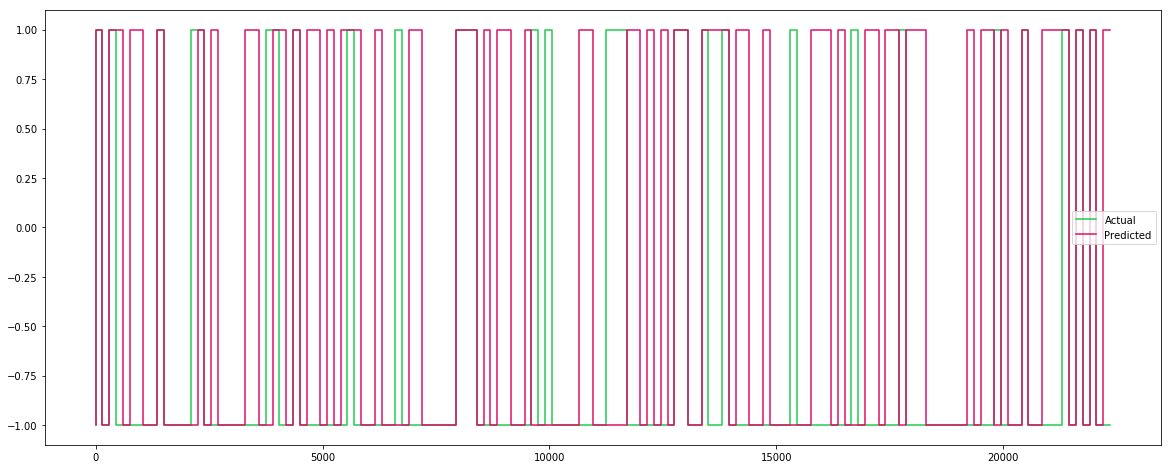

In [421]:
classifier = LogisticRegression()
X = train
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

In [422]:
### Confusion Matrix for Logistic Regression (Train Dataset)

In [423]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 64.9333333333%

Precision (0): 0.8
Recall (0): 0.86

Precision (1): 0.6
Recall (1): 0.33


Predicted,0,1
Actual,,
0,11647,5915
1,1975,2963


C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


[-1  1]


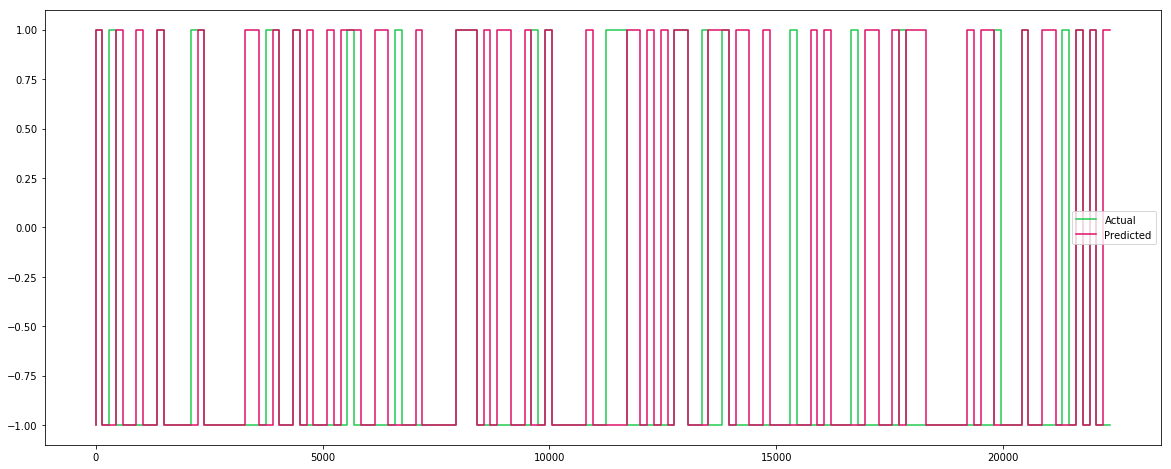

In [424]:
classifier = LogisticRegression()
X = train
Y = [-1 if y == 0 else 1 for y in X['default payment next month'].values ]
m = np.shape(X)[0]
classifier.train(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values, Y)
T = classifier.use(X[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='#1ECA4E')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='#DE0D67')
plt.legend()
plt.show()

### Confusion Matrix for Logistic Regression  (After training the model on train dataset and using it to predict on the test dataset)

In [425]:
matrix = pd.crosstab(pd.Series(X['default payment next month'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 69.9022222222%

Precision (0): 0.83
Recall (0): 0.85

Precision (1): 0.55
Recall (1): 0.37


Predicted,0,1
Actual,,
0,13021,4541
1,2231,2707


### Comparison of the models:
Strategic REGRESSION is a decent direct order calculation. be that as it may, it has certain confinements as beneath: 

1. Two-Class Problems: 

Strategic relapse is expected for double arrangement issues. Despite the fact that, It can be reached out for multi-class characterization, however we have other better calculation for that. 

2. It is Unstable With Separated Classes. 

Strategic relapse can wind up flimsy when the classes are all around isolated. 

3. It is shaky when there are couple of cases from which to assess the parameters. 

To overcome the drabacks we have another classifier LDA. 

Straight DISCRIMINANT ANALYSIS is a direct strategy for multi-class characterization issues. Indeed, even with twofold characterization issues, it is a smart thought to attempt both calculated relapse and straight discriminant investigation. 

LDA requires a supposition of equivalent change covariance grids between the info factors for grouping phase of the investigation. In the event that the grids generously contrast, perceptions will have a tendency to be doled out to the class where changeability is more noteworthy. To defeat the issue, QDA was designed. QDA is an alteration of LDA which takes into account the above heterogeneity of classes' covariance grids. However as the quantity of indicators turns out to be high, we can encounter a computational cost with QDA. 

in any case, when all is said in done, LDA has a tendency to be superior to QDA if there are moderately few preparing perceptions, so along these lines lessening change is pivotal. QDA is prescribed if the preparation set is expansive, with the goal that the difference of the classifier isn't a noteworthy concern. 

Between Logistic relapse, LDA and QDA, we have to think about the accompanying: 

1. the decision boundary that is required. 

The pocket calculation is likewise regulated learning calculation and is utilized for twofold grouping. In this way, can be utilized adequately on the off chance that we have two classes of yields. They can work just on directly separable datasets similar to a straight characterization calculation.

# Conclusions

According to me the best classifier model Linear Regression Model as it has the highest accuracy on the test dataset. 

**Challenges faced:**
* Plotting the graphs
* Partitioning the data
* Calculating Accuracy, True Positive and True Negative
. 

# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. https://seaborn.pydata.org/examples/index.html
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://seaborn.pydata.org/generated/seaborn.countplot.html
6. https://matplotlib.org/examples/pylab_examples/step_demo.html